##### About data
* PassengerId is the unique id of the row and it doesn't have any effect on target
* Survived is the target variable we are trying to predict (0 or 1):
* * 1 = Survived
* * 0 = Not Survived
* Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
* * 1 = Upper Class
* * 2 = Middle Class
* * 3 = Lower Class
* Name, Sex and Age are self-explanatory
* SibSp is the total number of the passengers' siblings and spouse
* Parch is the total number of the passengers' parents and children
* Ticket is the ticket number of the passenger
* Fare is the passenger fare
* Cabin is the cabin number of the passenger
* Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
* * C = Cherbourg
* * Q = Queenstown
* * S = Southampton

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("titanic.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.shape

(891, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Analysis on survival

In [7]:
data["Survived"].value_counts().reset_index()

,Survived,count
0,0,549
1,1,342


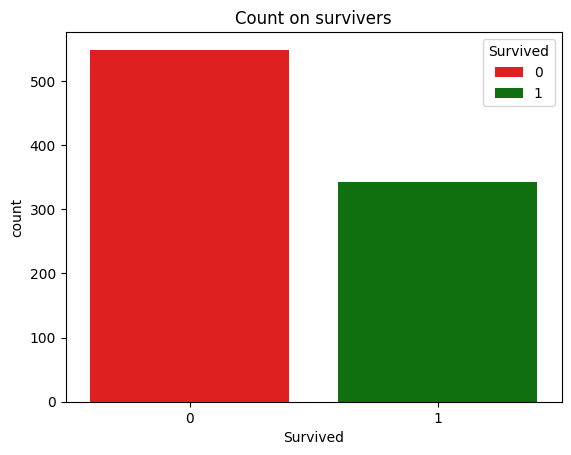

In [8]:
sns.countplot(x='Survived', data=data,hue='Survived',palette=['red','green'])
plt.title("Count on survivers")
plt.show()

In [9]:
total_passengers=len(data["Survived"])
survived=len(data[data["Survived"] == 1])
survival_percentage = ( survived/ total_passengers) * 100
print("Number of survivors:", survived)
print("Survival percentage: {:.2f}%".format(survival_percentage))

Number of survivors: 342
Survival percentage: 38.38%


#### Survival By Class

In [10]:
class_psg=data["Pclass"].value_counts()
class_psg

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

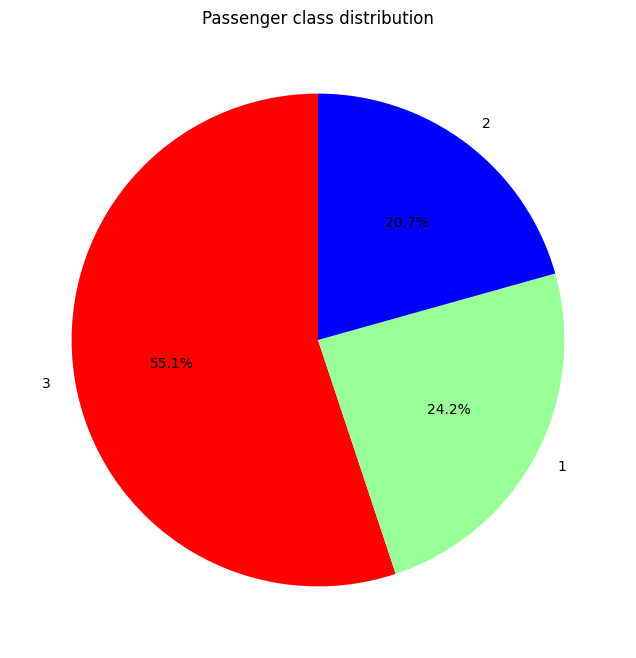

In [11]:
plt.figure(figsize=(8,8))
plt.pie(class_psg,labels=class_psg.index,autopct='%1.1f%%', startangle=90, colors=['red', '#99ff99','blue'])
plt.title("Passenger class distribution")
plt.show()

* Most of the passengers are travelled in 3rd class

In [12]:
data.groupby(["Pclass","Survived"])["Survived"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

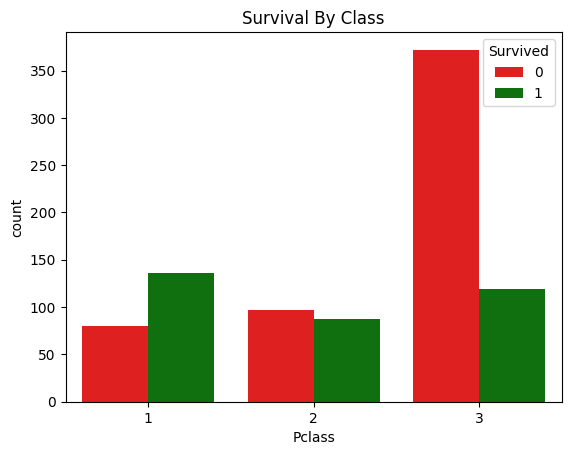

In [13]:
sns.countplot(x='Pclass',data=data,hue='Survived',palette=['red','green'])
plt.title("Survival By Class")
plt.show()

* Most of dead people are who board on 3rd class , most of the people were travelled 3rd class
* Highest number of survaival is from 1st class 

#### Surviaval By Age

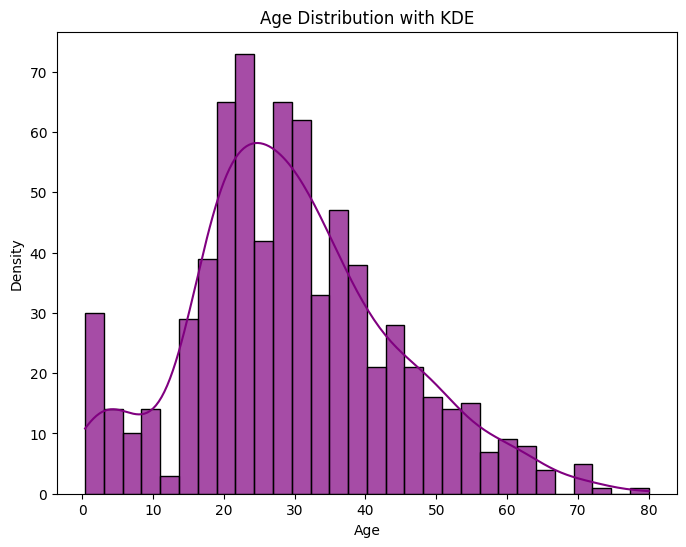

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True, color='purple', alpha=0.7)
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

* Looking in to age distribution , most of the passengers are from 20-35 age gap

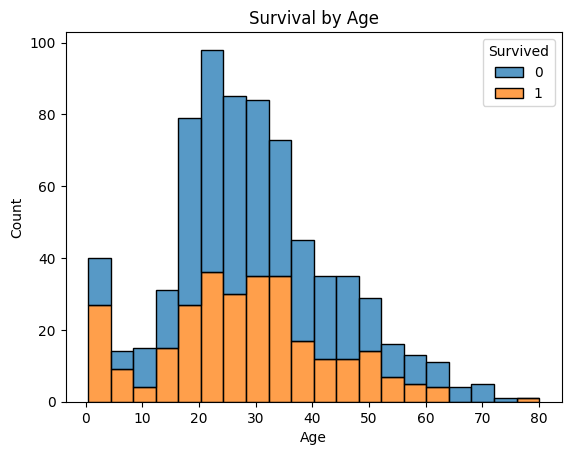

In [15]:
sns.histplot(x="Age", hue="Survived", data=data, multiple="stack")
plt.title("Survival by Age")
plt.show()

* Most of people killed in the age gap of 15 -40

#### Survival By Gender

In [16]:
gen_count=data["Sex"].value_counts()
gen_count

Sex
male      577
female    314
Name: count, dtype: int64

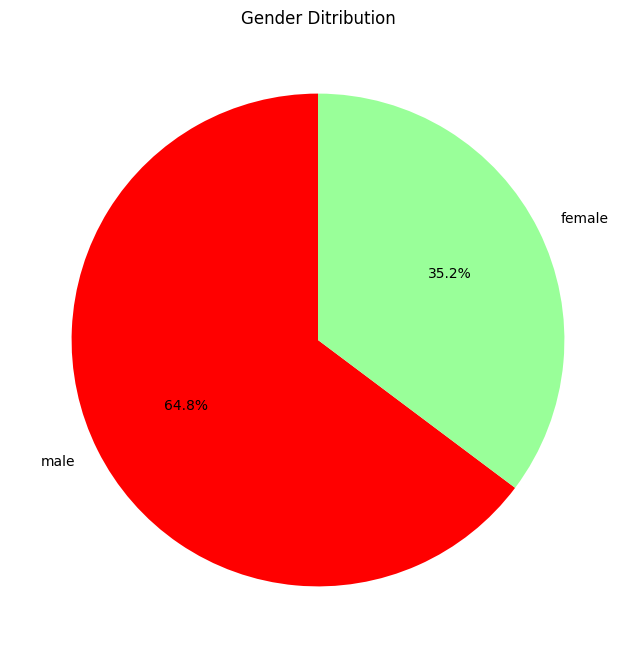

In [17]:
plt.figure(figsize=(8,8))
plt.pie(gen_count,labels=gen_count.index,autopct='%1.1f%%', startangle=90, colors=['red', '#99ff99'])
plt.title("Gender Ditribution")
plt.show()

* Most of the passengers are male 

In [18]:
data.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

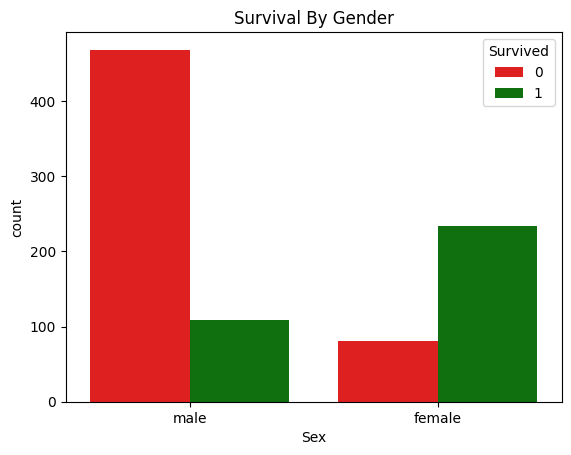

In [19]:
sns.countplot(x='Sex',data=data,hue='Survived',palette=['red','green'])
plt.title("Survival By Gender")
plt.show()

* Most of female passengers are survived but most of the male passengers are killed

#### Survival by Embarked Port

In [20]:
count_emb=data['Embarked'].value_counts()
count_emb

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

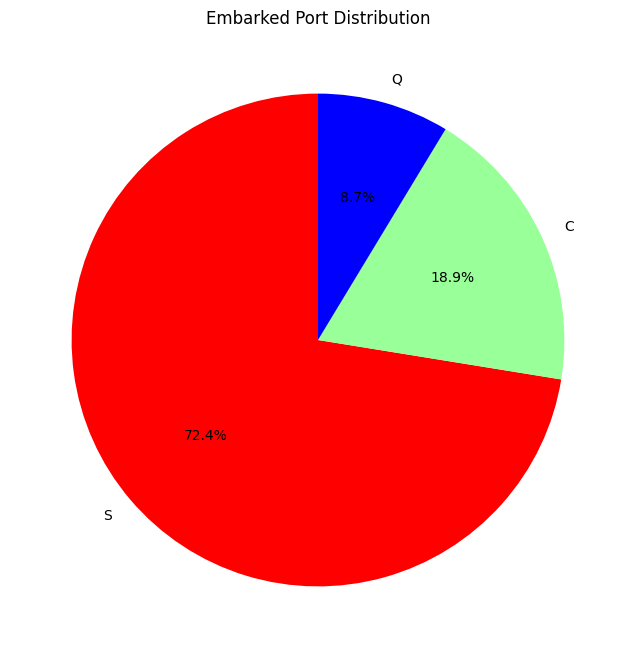

In [21]:
plt.figure(figsize=(8,8))
plt.pie(count_emb,labels=count_emb.index,autopct='%1.1f%%', startangle=90, colors=['red', '#99ff99','blue'])
plt.title("Embarked Port Distribution")
plt.show()

* From this we can see most of the passengers are boarded from Southampton and least from Queenstown

In [22]:
data.groupby(["Embarked","Survived"])["Survived"].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

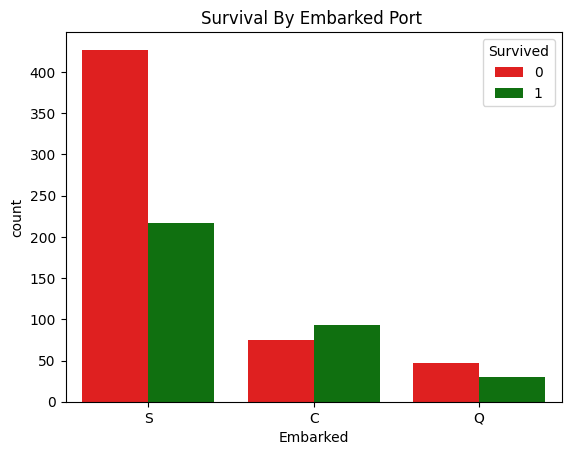

In [23]:
sns.countplot(x='Embarked',data=data,hue='Survived',palette=['red','green'])
plt.title("Survival By Embarked Port ")
plt.show()

* As expected number of dead person is high in boarded from Southampton and least from Queenstown
* The number of survived is less than dead persons in boarded from Southampton and  Queenstown but vise versa in Cherbourg

### DATA PREPROCESSING

In [24]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* we have missing values in Age , Cabin and Embarked.

In [25]:
# handling missing values in age by mean
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [26]:
# handling missing values in Cabin adding a new category "U" means unknwon
data['Cabin'].fillna("U",inplace=True)

In [27]:
# handling th missing values in Embarked by finding mode
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [28]:
# Drop columns that are not necessary for the analysis
data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [29]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [30]:
# Convert categorical features to numerical representations using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Sex']=label_encoder.fit_transform(data['Sex'])
data['Embarked']=label_encoder.fit_transform(data['Embarked'])

In [31]:
# Create dummy variables for 'Pclass' and concatenate with the dataset
pclass_dummies = pd.get_dummies(data['Pclass'], prefix='Pclass')
data = pd.concat([data, pclass_dummies], axis=1)
data.drop(columns=['Pclass'], inplace=True)

Now the data is ready for modelling

In [32]:
X=data.drop(columns=["Survived"])
y=data["Survived"]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [35]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=1000)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred=lg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [37]:
print("The accuracy=:",accuracy_score(y_test,y_pred))

The accuracy=: 0.7988826815642458


In [38]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



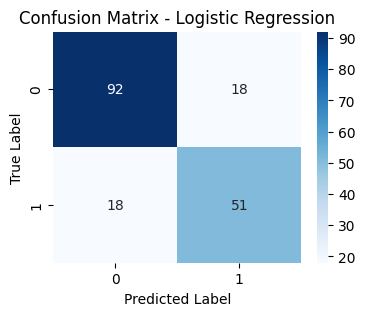

In [39]:
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred=rfc.predict(X_test)

In [44]:
print("The accuracy=:",accuracy_score(y_test,y_pred))

The accuracy=: 0.8435754189944135


In [45]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       110
           1       0.87      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



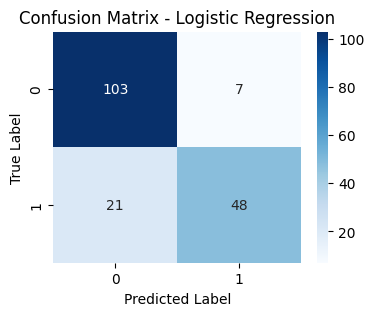

In [46]:
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

* Best fit model is RandomForest Classifier